# Assignment no 1

In [26]:
#from google.colab import files
from google.colab.patches import cv2_imshow
import cv2 as cv

In [21]:
image_url = 'https://drive.google.com/file/d/1B83gfAGiqqFaBeq6V-JcBN0d27PZolcs/view?usp=sharing'

In [22]:
from google.colab.patches import cv2_imshow # for image display
from skimage import io

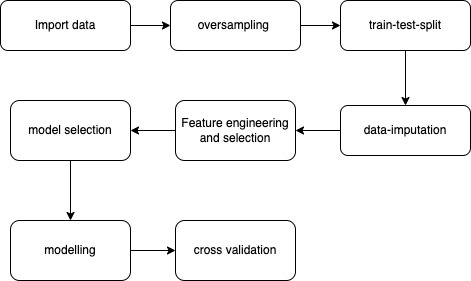

In [30]:

image = io.imread("assignment_9_no1.jpeg") 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_2)
print('\n')

Penjelasan


1.   Import data --> step pertama pada setiap proyek data science
2.   oversampling --> oversampling digunakan untuk mengatasi imbalance dataset. 
3.   train-test=split --> membagi dataset menjadi train untuk melatih model, dan dataset test untuk mengetest atau mengevaluasi model. mengapa dilakukan sebelum melakukan data processing seperti data imputation? digunakan untuk menghindari isu data leakage, atau informasi yang ada di dataset test terekam oleh model secara tidak sengaja. ref : https://towardsdatascience.com/avoid-data-leakage-split-your-data-before-processing-a7f172632b00#:~:text=Rule%20of%20thumb%3A%20Split%20your,makes%20model%20evaluation%20overly%20optimistic. 
4.   data imputation --> mengisi nilai kosong pada dataset train dan test agar siap diproses model
5.   model selection --> memilih model yang kira2 cocok untuk dataset. jika terdapat hubungan linear, maka bisa memilih model linear seperti linear regression. Jika non linear, bisa melakukan tranformasi data agar menjadi linear ref: https://www.johndcook.com/blog/2008/03/07/how-to-linearize-data-for-regression/
Jika tidak memungkinkan untuk membuat data tidak linear, bisa menggunkan model yang cukup baik menghandle data non linear seperti decision tree or random forest. ref: https://towardsdatascience.com/non-linear-regression-with-decision-trees-and-random-forest-afae406df27d
6.  melakukan modelling terhadap data
7.  mengevaluasi hasil dari model. Dari hasil evaluasi ini kita dapat menilai hasil prediksi model, dan bisa melakukan beberapa cara agar model kita bisa mendapatkan hasil yang lebih baik. Ref : https://www.statworx.com/en/content-hub/blog/evaluating-model-performance-by-building-cross-validation-from-scratch/#:~:text=Cross%2Dvalidation%20is%20a%20model,be%20expected%20on%20unseen%20data. 






# Assignment no 2

Before we begin, lets install some libraries

In [32]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot

     |████████████████████████████████| 106 kB 5.5 MB/s 


In [320]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [323]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTENC

# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

## step 1. import the *data*

In [259]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_response_model/marketing_campaign.csv", sep = ";")

check for imbalance data 

In [260]:
df_raw["Response"].value_counts() 

0    1906
1     334
Name: Response, dtype: int64

the majority of customers are not accepting last campaign. This is a classic imbalanced data. Let's try to balance the class, and to avoid overfitting issue, we will use Smote-NC method. ref: https://towardsdatascience.com/7-over-sampling-techniques-to-handle-imbalanced-data-ec51c8db349f

In [261]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

only column income has some null values. becuase there are only few missing values, we can simply drop the rows who has missing values

In [262]:
df_raw = df_raw.drop(columns=["ID","Year_Birth","Dt_Customer"]).dropna()

In [263]:
df_raw.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [264]:
oversample = SMOTENC(random_state=42, categorical_features=[0, 1])

In [265]:
df_raw_x = df_raw.drop(columns=["Response"])
df_raw_y = df_raw["Response"]

In [266]:
X_over, y_over = oversample.fit_resample(df_raw_x, df_raw_y)

In [267]:
df_resample = X_over.join(y_over)

In [268]:
df_resample["Marital_Status"].value_counts()

Married     1330
Single      1116
Together     811
Divorced     381
Widow        121
Alone          3
Absurd         2
YOLO           2
Name: Marital_Status, dtype: int64

train test split


In [269]:
y = df_resample["Response"]
X = df_resample.drop(columns=["Response"])


In [270]:
# split data to train and test data
# with test size is 30% of overall data
# use stratified sampling
# and set RNG to 1000
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [271]:
y_train_churn

571     0
1600    0
3763    1
1932    0
921     0
       ..
3301    1
147     0
3338    1
178     0
558     0
Name: Response, Length: 2636, dtype: int64

## EDA

In [272]:
data_train = X_train_churn.join(y_train_churn)

In [273]:
data_test = X_test_churn.join(y_test_churn)

In [274]:
import seaborn as sns

In [275]:
data_train["Education"].dtypes == 'object'

True

In [276]:
data_train.columns 

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

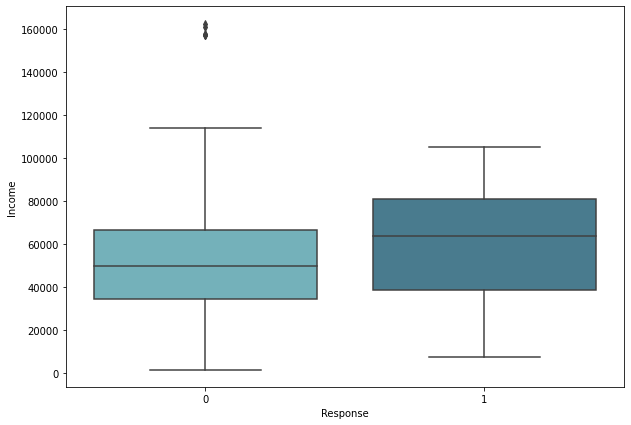

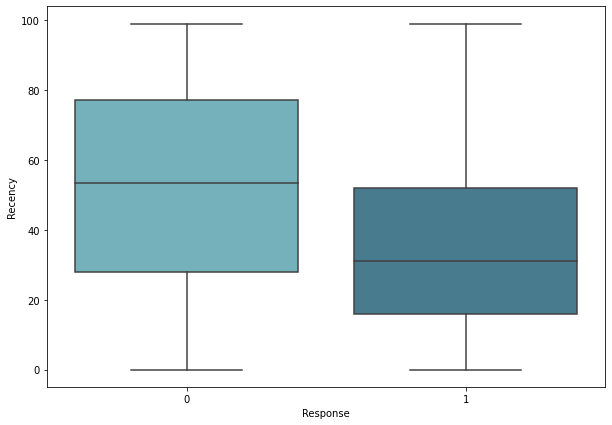

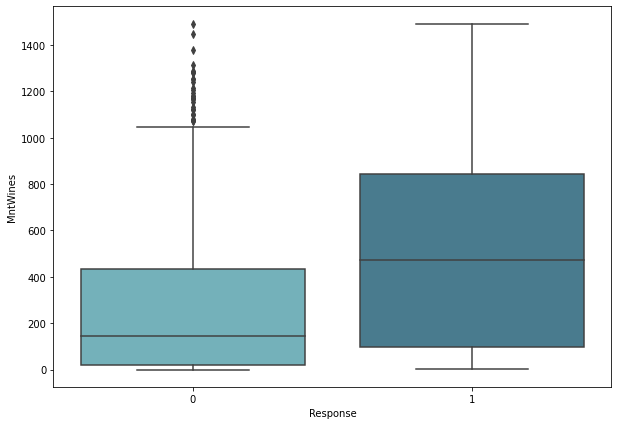

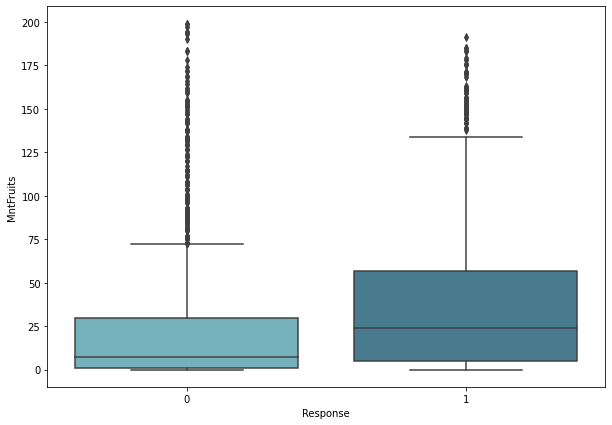

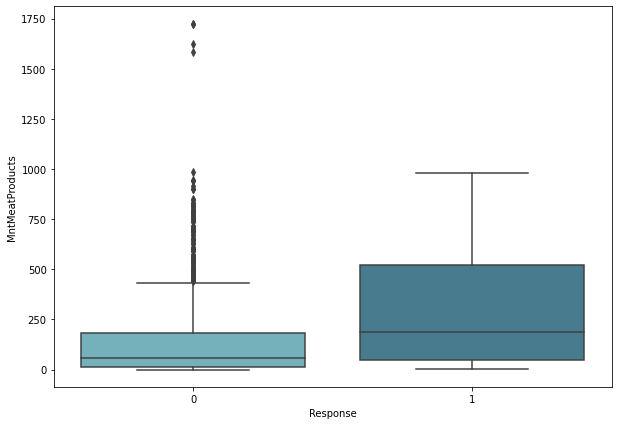

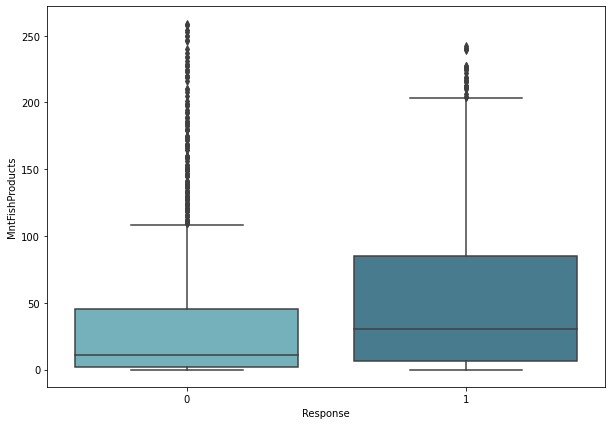

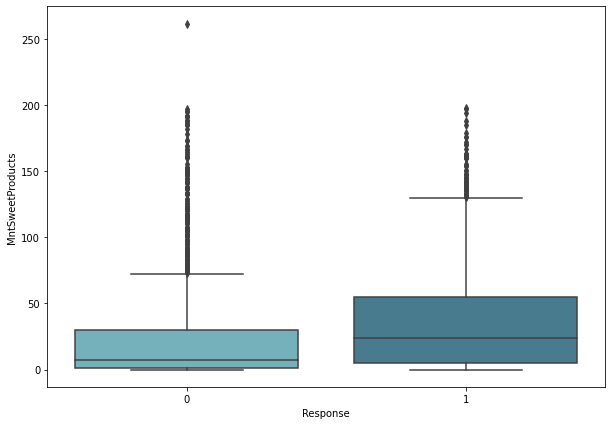

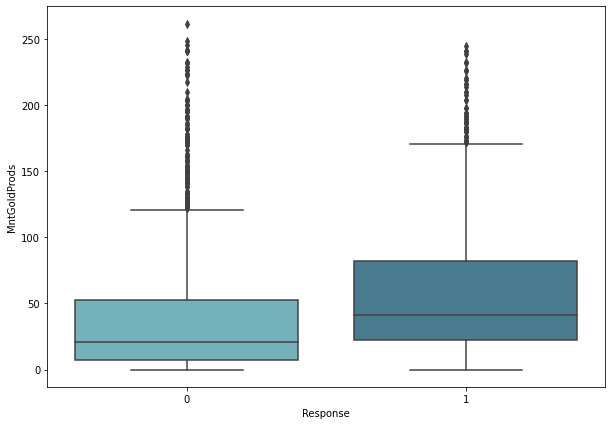

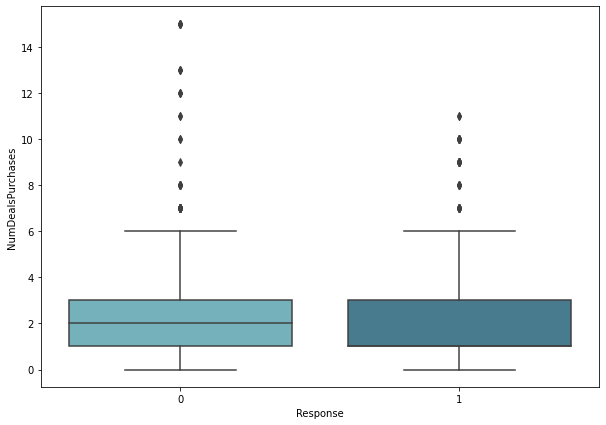

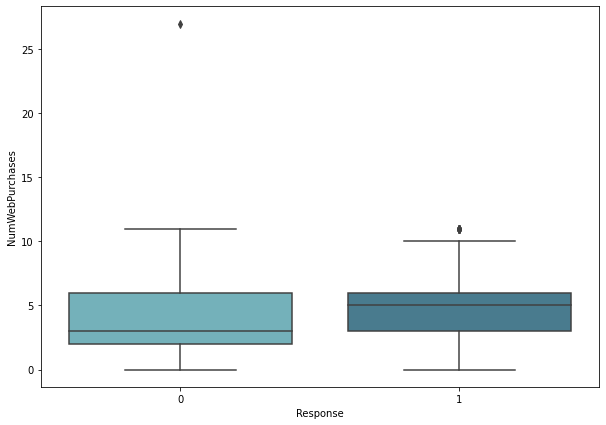

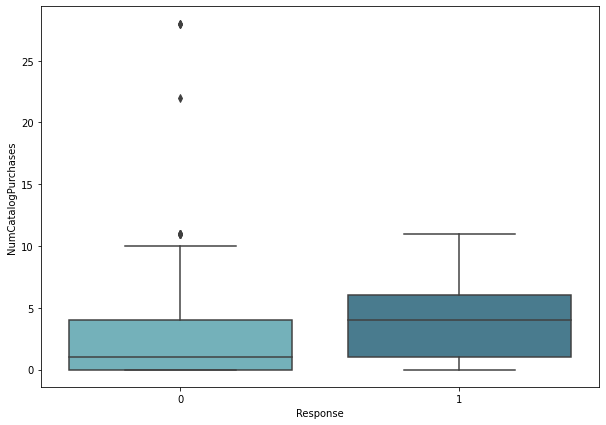

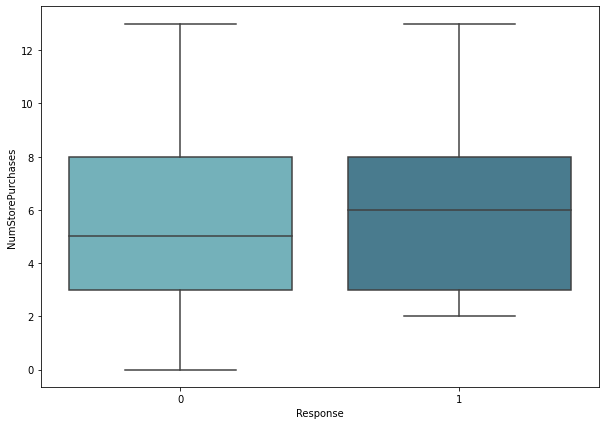

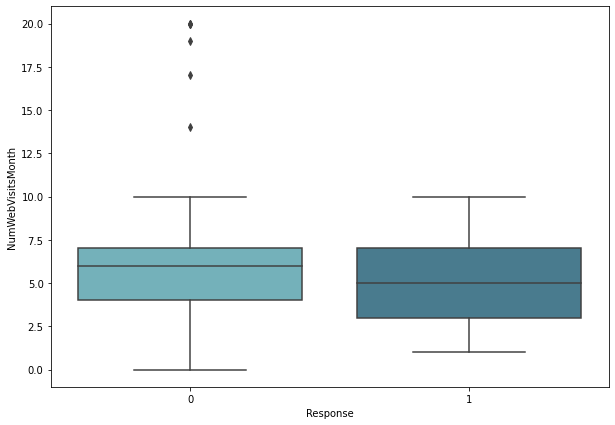

In [277]:
for x_col in ["Income",'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'] :
    plt.figure(figsize = (10,7))
    sns.boxplot(x = "Response", y=x_col, data = data_train, palette= 'GnBu_d')
    plt.show()

Based on this plot, we can see that some variables have similar median for two groups of customers. Thus, we select only variables who have different median (albeit only small difference) which are : income, recency,Mntfruits, MntMeatproducts,Mntfistproducts,MntSweetproduct,MntGoldproducts,NumWebPurchases,NumCatalogPurchase

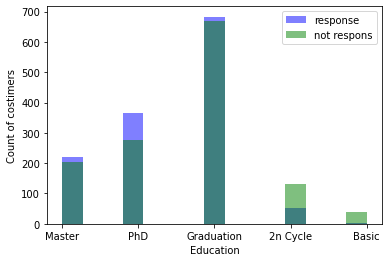

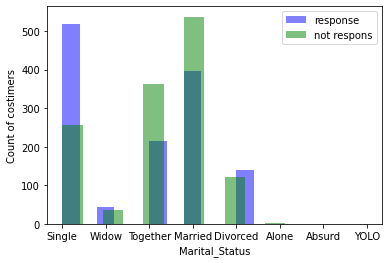

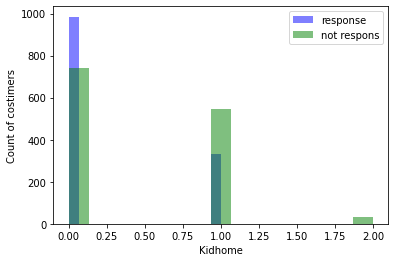

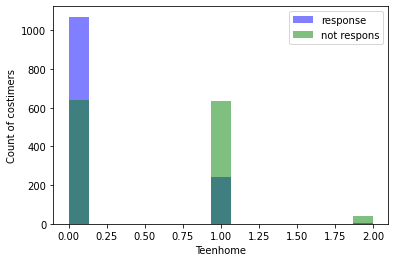

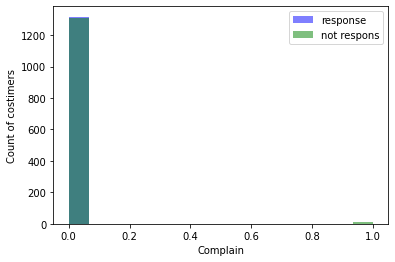

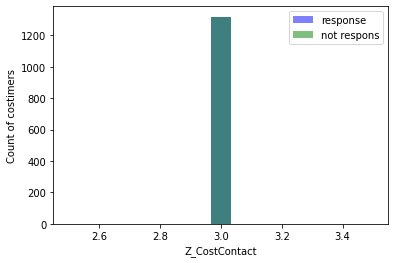

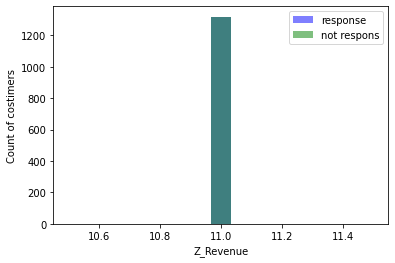

In [278]:
#plotting demographic variables
for x_col in ['Education', 'Marital_Status','Kidhome', 'Teenhome','Complain', 'Z_CostContact', 'Z_Revenue'] : 
    fig, ax = plt.subplots()

    ax.hist(data_train[data_train["Response"]==1][x_col], bins=15, alpha=0.5, color="blue", label="response")
    ax.hist(data_train[data_train["Response"]==0][x_col], bins=15, alpha=0.5, color="green", label="not respons")
    ax.set_xlabel(x_col)
    ax.set_ylabel("Count of costimers")
    ax.legend();

Based on this plot, we can conclude that if customers are single, have a post 
graduate degree, and do not have kids at home then they more likely to accept campaign. Thus, we select education, marital_status, teenhome, and kidhome as our predictors

## data preprocessing


In [279]:
data_train_fix = data_train[["Response","Income",'Recency', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
      'NumWebPurchases', 'NumCatalogPurchases', 'Education', 'Marital_Status','Kidhome', 'Teenhome']]

In [280]:
data_test_fix = data_test[["Response","Income",'Recency', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
      'NumWebPurchases', 'NumCatalogPurchases', 'Education', 'Marital_Status','Kidhome', 'Teenhome']]

In [281]:
data_train_fix.columns

Index(['Response', 'Income', 'Recency', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'Education', 'Marital_Status',
       'Kidhome', 'Teenhome'],
      dtype='object')

In [282]:
data_train["Marital_Status"].value_counts()

Married     934
Single      776
Together    580
Divorced    261
Widow        80
Alone         3
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

In [283]:
data_test["Marital_Status"].value_counts()

Married     396
Single      340
Together    231
Divorced    120
Widow        41
Absurd        1
YOLO          1
Name: Marital_Status, dtype: int64

In [284]:
data_train_ready = pd.get_dummies(data_train_fix, drop_first=True)

In [285]:
data_train_ready.columns

Index(['Response', 'Income', 'Recency', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'Kidhome', 'Teenhome',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

In [286]:
data_test_ready = pd.get_dummies(data_test_fix, drop_first=True)

## first Model : Logistic Regression

In [296]:
y_train_churn = data_train_ready["Response"]
X_train_churn = data_train_ready.drop(columns=["Response",'Marital_Status_Alone']) #Somehoe, Marital_status_alone is not found in data_Test, so I drop it as the data containas only 2 rows of this info


# add constant to model
X_train_int = sm.add_constant(X_train_churn)
# define and fit model to data
logistic_reg_sm = sm.Logit(y_train_churn, X_train_int).fit()

         Current function value: 0.502387
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [297]:
# check summary of model
logistic_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 2636
Model:                          Logit   Df Residuals:                     2614
Method:                           MLE   Df Model:                           21
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                  0.2752
Time:                        15:31:25   Log-Likelihood:                -1324.3
converged:                      False   LL-Null:                       -1827.1
Covariance Type:            nonrobust   LLR p-value:                1.720e-199
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.6063      1.105      0.549      0.583      -1.560       2.773
Income                  -8.321e-06   4.21e-06     -1.976      0.048   -1.66e-05   -6.71e-08
Recency                    -0.0287      0.002    -14.928      0.000      -0.032      -0.025
MntFruits                  -0.0034      0.002     -2.099      0.036      -0.007      -0.000
MntMeatProducts             0.0017      0.000      4.895      0.000       0.001       0.002
MntFishProducts            -0.0046      0.001     -3.653      0.000      -0.007      -0.002
MntSweetProducts           -0.0029      0.002     -1.820      0.069      -0.006       0.000
MntGoldProds                0.0048      0.001      4.114      0.000       0.002       0.007
NumWebPurchases             0.1550      0.024      6.450      0.000       0.108       0.202
NumCatalogPurchases         0.0720      0.029      2.510      0.012       0.016       0.128
Kidhome                    -0.4114      0.126     -3.266      0.001      -0.658      -0.165
Teenhome                   -1.6040      0.117    -13.692      0.000      -1.834      -1.374
Education_Basic            -2.6234      1.042     -2.519      0.012      -4.665      -0.582
Education_Graduation        0.8167      0.207      3.951      0.000       0.412       1.222
Education_Master            0.9916      0.232      4.276      0.000       0.537       1.446
Education_PhD               1.3625      0.223      6.104      0.000       0.925       1.800
Marital_Status_Divorced     0.0334      1.073      0.031      0.975      -2.069       2.136
Marital_Status_Married     -0.4683      1.065     -0.440      0.660      -2.556       1.619
Marital_Status_Single       0.4432      1.067      0.415      0.678      -1.648       2.535
Marital_Status_Together    -0.7253      1.067     -0.680      0.497      -2.817       1.367
Marital_Status_Widow       -0.1167      1.097     -0.106      0.915      -2.266       2.033
Marital_Status_YOLO       -16.2337   1767.001     -0.009      0.993   -3479.492    3447.025
===========================================================================================
"""

In [298]:
# modelling using SKlearn
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train_churn, y_train_churn)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1000)

model evaluation

In [299]:
y_test_churn = data_test_ready["Response"]
X_test_churn = data_test_ready.drop(columns=["Response"])

In [300]:
X_train_churn.columns


Index(['Income', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
       'NumCatalogPurchases', 'Kidhome', 'Teenhome', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [301]:
X_test_churn.columns

Index(['Income', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
       'NumCatalogPurchases', 'Kidhome', 'Teenhome', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [302]:
# predict
pred_result = logistic_reg.predict(X_test_churn)
pred_proba_result = logistic_reg.predict_proba(X_test_churn)

In [303]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_churn, pred_result, target_names=['not responding','respon'], output_dict=True))

,not responding,respon,accuracy,macro avg,weighted avg
precision,0.684575,0.692586,0.688496,0.688581,0.688581
recall,0.699115,0.677876,0.688496,0.688496,0.688496
f1-score,0.691769,0.685152,0.688496,0.688460,0.688460
support,565.000000,565.000000,0.688496,1130.000000,1130.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


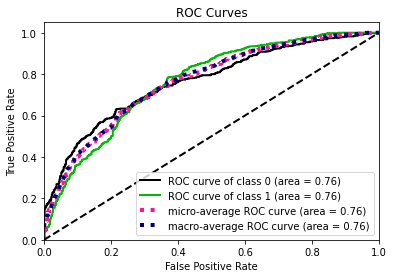

In [304]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_churn, pred_proba_result);

Discussion. Using Logreg, the F1-score for predicting responding customer is 0.68 and ROC curve is 0.76. We use this as a benchmark.



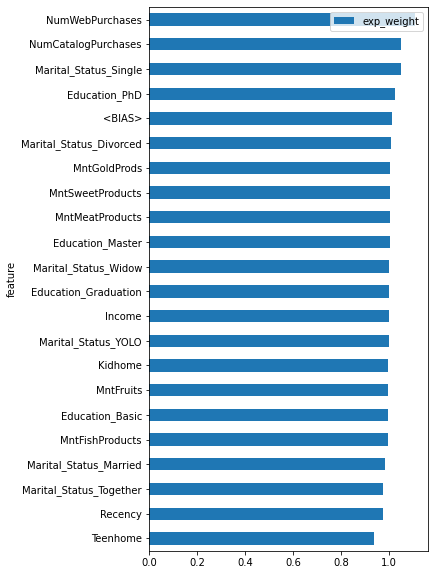

In [306]:
var_name = data_test_ready.drop(['Response'], axis = 1).columns.tolist()
# plt.rcParams["figure.figsize"] = (5,10)
eli5.explain_weights_df(
    logistic_reg, feature_names= var_name
).assign(
    # create new weight called exp_weight
    exp_weight = lambda x: x['weight'].map(lambda x: np.exp(x))
).sort_values(
    by = "exp_weight"
).plot(
    x = 'feature',
    y = 'exp_weight',
    kind = 'barh',
    figsize = (5,10)
)

## second model using Decision Tree

In [307]:
# define regression tree model
tree_clf = DecisionTreeClassifier(random_state = 1000, max_depth = 5)
# fit model to data
tree_clf.fit(X_train_churn, y_train_churn)

DecisionTreeClassifier(max_depth=5, random_state=1000)

In [308]:
# prediction
pred_result = tree_clf.predict(X_test_churn)
pred_proba_result = tree_clf.predict_proba(X_test_churn)

In [309]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_churn, pred_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.837624,0.772800,0.80177,0.805212,0.805212
recall,0.748673,0.854867,0.80177,0.801770,0.801770
f1-score,0.790654,0.811765,0.80177,0.801209,0.801209
support,565.000000,565.000000,0.80177,1130.000000,1130.000000


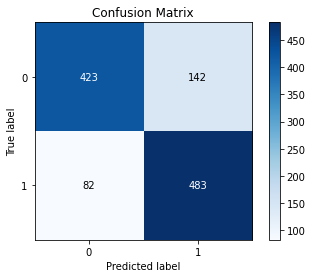

In [310]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_churn, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


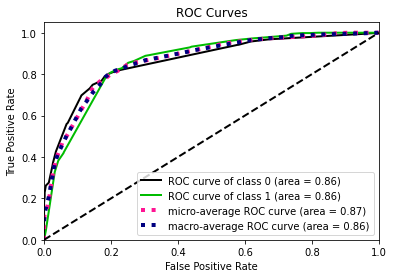

In [311]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_churn, pred_proba_result);

Discussion. Using Decision tree, the F1-score for predicting responding customers is 0.81 and ROC curve is 0.86. This is the best model so far

## third model : Naive Bayes

In [313]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_churn, y_train_churn)

GaussianNB()

In [314]:
# prediction
pred_result = classifier.predict(X_test_churn)
pred_proba_result = classifier.predict_proba(X_test_churn)

In [315]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_churn, pred_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.619910,0.670236,0.640708,0.645073,0.645073
recall,0.727434,0.553982,0.640708,0.640708,0.640708
f1-score,0.669381,0.606589,0.640708,0.637985,0.637985
support,565.000000,565.000000,0.640708,1130.000000,1130.000000


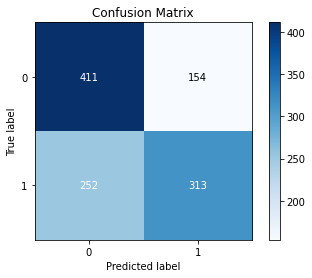

In [316]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_churn, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


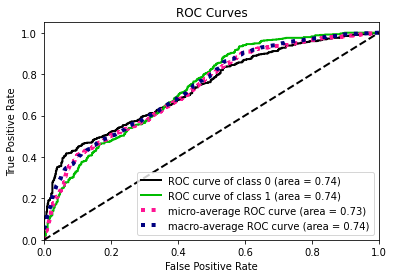

In [317]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_churn, pred_proba_result);

Discussion : using Naivebayes, the F1 score and ROC score are lower than our current best model. Thus, we discard this model

## fourth model : RuleFit

In [324]:
# define RuleFit model
rulefit_clf = SkopeRules(
    n_estimators = 10,
    random_state = 1000,
    max_features = 'sqrt',
    feature_names = var_name
)

# fit model to data
rulefit_clf.fit(X_train_churn, y_train_churn)

SkopeRules(feature_names=['Income', 'Recency', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                          'NumWebPurchases', 'NumCatalogPurchases', 'Kidhome',
                          'Teenhome', 'Education_Basic', 'Education_Graduation',
                          'Education_Master', 'Education_PhD',
                          'Marital_Status_Divorced', 'Marital_Status_Married',
                          'Marital_Status_Single', 'Marital_Status_Together',
                          'Marital_Status_Widow', 'Marital_Status_YOLO'],
           max_features='sqrt', random_state=1000)

In [325]:
rulefit_clf.estimators_


[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1970544363),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1077348022),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=473922508),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2113565594),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1173624936),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1474976016),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1528487102),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1071226617),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=499256588),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=9065945

In [327]:
# prediction
pred_result = rulefit_clf.predict(X_test_churn)
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_churn, pred_result, target_names=['not responding','responding'], output_dict=True))

,not responding,responding,accuracy,macro avg,weighted avg
precision,0.988095,0.539197,0.572566,0.763646,0.763646
recall,0.146903,0.998230,0.572566,0.572566,0.572566
f1-score,0.255778,0.700186,0.572566,0.477982,0.477982
support,565.000000,565.000000,0.572566,1130.000000,1130.000000


Discussion. Altough F1 score and accuracy are lower than our current best model, we find that this model has a very high recall score (99%). This means that this model can detect few false negative. In our business context, we want to have a model who can predict the likelihood of customers accepting our marketing campaign. A responding class Recall of 99% means that the model was able to catch 99% of the actual Responding cases. This is the measure we want, because we want to have as many responding customer as possible, and we want to minimise as few as possible cases where the model predicting the customer wont respond, when in reality they will respond. Because this false negative prediction will make us loss a profitable customer. In other words, It's important that we don't predict responding customers as non-responding customers. Therefore, it is the best choice if we choose RuleFit as our best model

## Recommendation using Best model 

In [328]:
print('The 5 most performing "churn rules" are the following one:\n')
for i_rule, rule in enumerate(rulefit_clf.rules_[:5]):
    print(rule[0])

The 5 most performing "churn rules" are the following one:

Recency <= 80.5 and Teenhome <= 0.5 and MntGoldProds > 12.5
Teenhome <= 0.5 and MntSweetProducts > 12.5 and Kidhome <= 0.5
Teenhome <= 0.5 and MntMeatProducts > 260.5 and MntFishProducts <= 218.5
Teenhome <= 0.5 and MntFruits > 19.5 and MntSweetProducts > 23.5
Teenhome <= 0.5 and Marital_Status_Single <= 0.5 and MntGoldProds > 12.5


Based on these 5 most perfoming rules, in general single customers or customers without children have a high likelihood to accept our last campaign.  
Recommedations for managers:


1.   Encourage not-having-teen children customers and single customers to buy more GoldProducts 
2.   Encourage not-having-teen children customer to buy more sweet products for their kids
3.   Sells fruits and sweet products as a bundle, because customers who may have kids and buy lots of fruits and sweet for their childer will likely to accept our marketing campaign. 

